In [5]:
# Install pandasql to run SQL queries inside Colab
!pip install -q pandasql pandas seaborn matplotlib

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

# Helper function for SQL
pysqldf = lambda q: sqldf(q, globals())

# Upload your CSV file (you can use the upload button)
from google.colab import files
uploaded = files.upload()

# Load data
df = pd.read_excel(list(uploaded.keys())[0])

# Preview
df.head()




Saving Sample - Superstore.xls to Sample - Superstore (2).xls


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit margin,Month,Year,Delivary Time,Season
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,0.1600,November,2016,3,Fall
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,0.3000,November,2016,3,Fall
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,0.4700,June,2016,4,Summer
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,-0.4000,October,2015,7,Fall
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,0.1125,October,2015,7,Fall


In [6]:
#Profit Margin by Category
query1 = """
SELECT Category, ROUND(SUM(Profit)/SUM(Sales), 2) AS Profit_Margin
FROM df
GROUP BY Category
ORDER BY Profit_Margin ASC
"""
result1 = pysqldf(query1)
print(result1)



          Category  Profit_Margin
0             None            NaN
1        Furniture           0.02
2  Office Supplies           0.17
3       Technology           0.17


In [8]:
#Profit Margin by Sub-Category
query2 = """
SELECT `Sub-Category`, ROUND(SUM(Profit)/SUM(Sales), 2) AS Profit_Margin
FROM df
GROUP BY `Sub-Category`
ORDER BY Profit_Margin ASC
"""
result2 = pysqldf(query2)
print(result2)


   Sub-Category  Profit_Margin
0          None            NaN
1        Tables          -0.09
2     Bookcases          -0.03
3      Supplies          -0.03
4      Machines           0.02
5        Chairs           0.08
6       Storage           0.10
7        Phones           0.13
8   Furnishings           0.14
9       Binders           0.15
10   Appliances           0.17
11          Art           0.24
12  Accessories           0.25
13    Fasteners           0.31
14      Copiers           0.37
15    Envelopes           0.42
16        Paper           0.43
17       Labels           0.44


In [9]:
#Top 5 Profit Draining Sub-Categories
query3 = """
SELECT `Sub-Category`, SUM(Profit) AS Total_Profit
FROM df
GROUP BY `Sub-Category`
ORDER BY Total_Profit ASC
LIMIT 5
"""
result3 = pysqldf(query3)
print(result3)


  Sub-Category  Total_Profit
0         None           NaN
1       Tables   -17725.4811
2    Bookcases    -3472.5560
3     Supplies    -1189.0995
4    Fasteners      949.5182


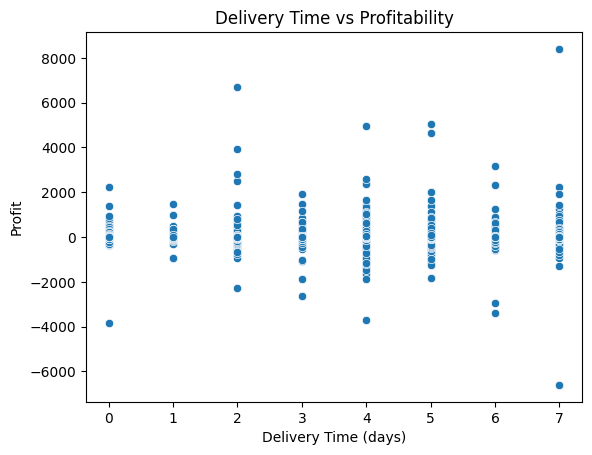

Correlation between Delivery Time and Profit: -0.00


In [13]:
#Python Analysis - Correlation Between Delivery Time and Profitability
# Scatter plot to visualize
sns.scatterplot(data=df, x="Delivary Time", y="Profit")
plt.title('Delivery Time vs Profitability')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Profit')
plt.show()

# Calculate Correlation
correlation = df['Delivary Time'].corr(df['Profit'])
print(f"Correlation between Delivery Time and Profit: {correlation:.2f}")


In [15]:
# Save outputs
result1.to_csv('Profit_Margin_by_Category.csv', index=False)
result2.to_csv('Profit_Margin_by_SubCategory.csv', index=False)
result3.to_csv('Top_5_Profit_Draining_SubCategory.csv', index=False)


In [16]:
# Download files
files.download('Profit_Margin_by_Category.csv')
files.download('Profit_Margin_by_SubCategory.csv')
files.download('Top_5_Profit_Draining_SubCategory.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>